# Predictions of Betting Lines on NBA Games by Machine Learning Methods

## Project  Motivation 

Sports betting has been one of the most high profits businesses for many years despite being illegal in most places in the US. On May 14, 2018, the US supreme court officially struck down the federal ban on sports betting, which means that any state can now legalize sports gambling if it desires. Although now only seven states have done so, this number will increase rapidly in the foreseeable future. It's not bold to predict that in a few years’ time one can even put bets on games through the sporting teams' official websites. The fast growing of sports betting sparks a need in more advanced technology supports. While game outcomes are influenced by many complex and unpredictable factors (e.g., a poor shooting night for a good basketball team), a well-trained machine learning model should still be able to generate reasonable predictions and provide guidelines on how to set more proper betting lines, which is the key to net profits for every betting company. On the other hand, it can also help gamblers to make good betting decisions.  

## Project Overview

Here I propose using several machine learning models to predict betting lines on National Basketball Association (NBA) games, the second most popular sport league in the US, based on the game statistics from previous seasons. The dataset in this project includes stats from all NBA games from 1996 to 2019. Feature engineering will be performed on the dataset to extract the most relevant features and also create new ones. Tree models will be trained and tested in this project. They are logistic regression classifier (LR), support vectors machine (SVMs) and convolutional neural networks (CNN). Predictions are made on game outcomes (win/lose), point spreads (win/lose by how many points) and total points scored in games. Performance of different models will be analyzed and compared. At the final stage of the project, the predicted betting lines are tested and compared with the actual ones in the 2019/2020 season scraped from major betting sites.   

## Project Details 

### Dataset

The dataset in this project is scraped from the NBA official website (https://stats.nba.com/) by the Requests library in python. Considering that the advanced stats are available only for games played after the 1996 season, in this project I collected stats from all NBA games played from 1996 to 2019, including both regular season and playoff games. Since basketball game involves a lot during this time period, the dataset is divided into three phases: 1996 to 2000, 2001 to 2010 and 2010 to 2018. When training models, different weights are assigned to these phases so that the more recent data has stronger influences in making predictions. The plan is to use 14 features to perform training. Among them only the Elo rating is a fabricated feature. All others are either directly extracted from the stats or through some simple mathematics manipulations. The Elo rating is a metric invented by Arpad Elo which reflects the strength of a team. It not only depends on the team's performance in each game and also takes into account the strength of that team's opponents.

<h4><center>Table 1. Features to Use in Training</center></h4>

| Feature | Abbreviation | Feature | Abbreviation | Feature | Abbreviation |
| --- | --- | --- | --- | --- |
| Field Goal Made | FGM | Field Goal Attempts | FGA | Field Goal Percentage | FGP |
| Three Point Made | 3PM | Three Point Attempts | 3PA | Three Point Percentage | 3PP |
| Free Throw Made | FTM | Free Throw Attempts | FTA | Free Throw Percentage | FTP |
| Assist to Turnover Ratio | ATR | Blocks | Blk | Elo Rating | Elo |
| Offensive Rebounds | OReb | Defensive Rebounds | DReb | | |

### Models

The three models chosen in this project are logistic regression, support vector machines and convolutional neural networks. 

__Logistic Regression (LR)__  LR is a regression analysis that works very well with categorical targets. It links targets to weights and inputs by an activation function (e.g., sigmoid function). The error function in this model, which is also called cross-entropy, is derived by taking the negative logarithm of the likelihood function. The scikit-learn package is used to build the LR model.  

__Support Vector Machines (SVMs)__  SVMs is a discriminative method which relies on a linear combination of a kernel evaluated at the training samples to make predictions. SVMs model is also called maximum margin classifiers because its key idea is to find the best decision boundary(ies) by maximizing margin. Kernel functions can be used to effectively reduce computational cost in high dimensional space. In this project, a linear kernel will be applied. The scikit-learn package is used to build the SVMs model.  

__Convolutional Neural Networks (CNN)__  CNN model is a biologically-inspired machine learning model which is consisted with interconnected units and nodes. In this project, a three layer concolutional neural network model will be constructed. It has two hidden layers of units between the input and output units. The Keras package is used to build the CNN model. 

## Exploratory Analysis

For convenience, the exploratory analysis is done on a relatively small subset which includes games stats from 2014 to 2018. In this session, I will show the structure of this dataset and also explore the correlation between the selected features and game outcomes, points scored, etc.

### Data Reading and Preprocessing 

In [31]:
#Import packages and libraries
import numpy as np # Linear Algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python Plotting Library
%matplotlib inline
import math

In [32]:
# Read in the dataset
df_nba = pd.read_csv("nba_stats_1996-2018.csv")
# Get the stats after 2016 season
df_nba = df_nba[df_nba['SEASON_YEAR']>='2014-15']

In [33]:
# Look at the feature names in this dataset
df_nba.columns

Index(['Unnamed: 0', 'SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM',
       'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'TOV',
       'STL', 'BLK', 'PF', 'PTS'],
      dtype='object')

In [34]:
# Rename the column names by the abbreviations
df_nba.columns = ['Index', 'Season', 'Team_ID', 'Team_ABB', 'Team_NAME', 'Game_ID', 'Game_DATE',
       'Matchup', 'WL', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'TOV',
       'STL', 'BLK', 'PF', 'PTS']

In [35]:
# Look at the shape of the dataset
df_nba.shape

(13120, 24)

The dataset has 13120 rows. Each row represents how a team does in a single NBA game. There are 24 columns in the dataset which include basic information like team name, game date, etc. and all the stats such as points scored, field goal percentage for the team at that game.  

In [36]:
# Create new features: field goal, 3 pointer, free throw percentages and assistant to turnover ratio
df_nba = df_nba.assign(FGP = df_nba.FGM/df_nba.FGA*100)
df_nba = df_nba.assign(FG3P = df_nba.FG3M/df_nba.FG3A*100)
df_nba = df_nba.assign(FTP = df_nba.FTM/df_nba.FTA*100)
df_nba = df_nba.assign(ATR = df_nba.AST/(df_nba.AST+df_nba.TOV)*100)
df_nba.fillna(value=0.0,inplace=True)

In [37]:
df_nba.reset_index(inplace=True, drop=True)
df_nba.head(5)

,Index,Season,Team_ID,Team_ABB,Team_NAME,Game_ID,Game_DATE,Matchup,WL,MIN,...,AST,TOV,STL,BLK,PF,PTS,FGP,FG3P,FTP,ATR
0,0,2014-15,1610612759,SAS,San Antonio Spurs,21401223,2015-04-15T00:00:00,SAS @ NOP,L,48.0,...,33,15,2,3,20,103,56.962025,30.000000,76.923077,68.750000
1,1,2014-15,1610612763,MEM,Memphis Grizzlies,21401220,2015-04-15T00:00:00,MEM vs. IND,W,48.0,...,12,13,10,3,17,95,47.368421,22.222222,80.769231,48.000000
2,2,2014-15,1610612752,NYK,New York Knicks,21401226,2015-04-15T00:00:00,NYK vs. DET,L,48.0,...,19,21,6,3,18,90,42.857143,36.842105,62.962963,47.500000
3,3,2014-15,1610612758,SAC,Sacramento Kings,21401230,2015-04-15T00:00:00,SAC @ LAL,W,48.0,...,30,10,10,4,16,122,54.761905,47.058824,53.658537,75.000000
4,4,2014-15,1610612755,PHI,Philadelphia 76ers,21401227,2015-04-15T00:00:00,PHI vs. MIA,L,48.0,...,26,18,7,5,21,101,45.783133,17.241379,80.000000,59.090909


In [38]:
# Separate the dataset into winning teams and losing teams.
df_winner = df_nba[df_nba['WL']=='W']
df_loser = df_nba[df_nba['WL']=='L']
print(df_winner.shape, df_loser.shape)

(6560, 28) (6560, 28)


Next let's look at histogram plots of features 'FGP', 'FG3P','FTP' and 'ATR' for both winners and losers.

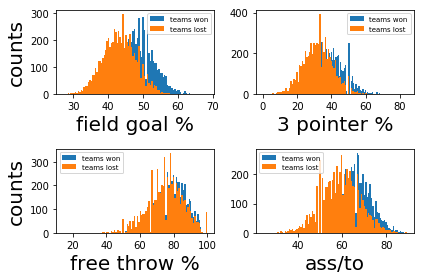

In [39]:
plt.figure(1)
plt.subplot(221)
(hist_Wfg, bins_fg) = plt.hist(df_winner.FGP,bins=100,range=(min(df_winner.FGP.tolist()+df_loser.FGP.tolist()),max(df_winner.FGP.tolist()+df_loser.FGP.tolist())), label='teams won')[:-1]
hist_Lfg = plt.hist(df_loser.FGP,bins=100,range=(min(df_winner.FGP.tolist()+df_loser.FGP.tolist()),max(df_winner.FGP.tolist()+df_loser.FGP.tolist())), label='teams lost')[0]
plt.xlabel('field goal %', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.legend(loc='best', prop={'size': 7})

plt.subplot(222)
(hist_Wfg3, bins_fg3) = plt.hist(df_winner.FG3P,bins=100,range=(min(df_winner.FG3P.tolist()+df_loser.FG3P.tolist()),max(df_winner.FGP.tolist()+df_loser.FGP.tolist())),label='teams won')[:-1]
hist_Lfg3 = plt.hist(df_loser.FG3P,bins=100,range=(min(df_winner.FG3P.tolist()+df_loser.FG3P.tolist()),max(df_winner.FG3P.tolist()+df_loser.FG3P.tolist())), label='teams lost')[0]
plt.xlabel('3 pointer %', fontsize=20)
#plt.ylabel('counts', fontsize=15)
plt.legend(loc='best', prop={'size': 7})

plt.subplot(223)
(hist_Wft, bins_ft) = plt.hist(df_winner.FTP,bins=100,range=(min(df_winner.FTP.tolist()+df_loser.FTP.tolist()),max(df_winner.FTP.tolist()+df_loser.FTP.tolist())),label='teams won')[:-1]
hist_Lft = plt.hist(df_loser.FTP,bins=100,range=(min(df_winner.FTP.tolist()+df_loser.FTP.tolist()),max(df_winner.FTP.tolist()+df_loser.FTP.tolist())),label='teams lost')[0]
plt.xlabel('free throw %',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.legend(loc='best', prop={'size': 7})

plt.subplot(224)
(hist_Watr, bins_atr) = plt.hist(df_winner.ATR,bins=100,range=(min(df_winner.ATR.tolist()+df_loser.ATR.tolist()),max(df_winner.ATR.tolist()+df_loser.ATR.tolist())), label='teams won')[:-1]
hist_Latr = plt.hist(df_loser.ATR,bins=100,range=(min(df_winner.ATR.tolist()+df_loser.ATR.tolist()),max(df_winner.ATR.tolist()+df_loser.ATR.tolist())), label='teams lost')[0]
plt.xlabel('ass/to',fontsize=20)
#plt.ylabel('counts', fontsize=15)
plt.legend(loc='best', prop={'size': 7})

plt.tight_layout()

Next, we can look at the direct correlation between winning percentage and these metrics.

In [40]:
# Compute winning percentages for each metric within histogram bins
prob_Wfg = hist_Wfg/(hist_Wfg+hist_Lfg)*100
prob_Wfg3 = hist_Wfg3/(hist_Wfg3+hist_Lfg3)*100
prob_Wft = hist_Wft/(hist_Wft+hist_Lft)*100
prob_Watr = hist_Watr/(hist_Watr+hist_Latr)*100

C:\Users\yiqichen\UB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\yiqichen\UB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yiqichen\UB\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\yiqichen\UB\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


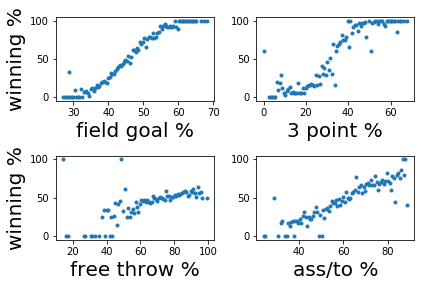

In [41]:
plt.figure(2)
plt.subplot(221)
plt.plot(bins_fg[:-1],prob_Wfg,'.')
plt.xlabel('field goal %', fontsize=20)
plt.ylabel('winning %', fontsize=20)

plt.subplot(222)
plt.plot(bins_fg3[:-1],prob_Wfg3,'.')
plt.xlabel('3 point %', fontsize=20)

plt.subplot(223)
plt.plot(bins_ft[:-1],prob_Wft,'.')
plt.xlabel('free throw %', fontsize=20)
plt.ylabel('winning %', fontsize=20)

plt.subplot(224)
plt.plot(bins_atr[:-1],prob_Watr,'.')
plt.xlabel('ass/to %', fontsize=20)

plt.tight_layout()

It is observed that teams shot more accurately in field goal and pointer percentages usually have a better chance to win. The same applies to the assistant-to-turnover ratio. However, free throw percentage does not have as large impact on winning as other features.

### Calculation and Validation of Elo Rating 

In the next part I will show how to calculate the Elo rating. The detailed explanation for the Elo rating can be found on https://en.wikipedia.org/wiki/Elo_rating_system. Here a base value of 1500 and a width of 400 are used. The k factor is set at 15. Higher k factor values will cause the rating to fluctuate largely while small values could not reflect the rating changes properly. Several tests show that 15 is a good choice.

In [42]:
# Define the base value and width of Elo ratings
base_elo, elo_width = 1500, 400
k_factor = 15

In [43]:
# Define functions to calculate the elo rating and the average season stats. 
def cal_elo(win_elo_before, lose_elo_before, home):
    """ Args:
        win_elo_befroe: Elo rating of winning team before this game.
        lose_elo_before: Elo rating of losing team before this game.
        home: the adjustment for homecourt advantage.
        Returns:
        win_elo_after: Elo rating for the winning team after this game.
        lose_elo_after: Elo rating for the losing team after this game.
    """
    expect_a = 1.0/(1+math.pow(10,1.0*(lose_elo_before - win_elo_before - home)/elo_width))
    diff_elo = k_factor * (1 - expect_a)
    win_elo_after = win_elo_before + diff_elo
    lose_elo_after = lose_elo_before-diff_elo
    return win_elo_after, lose_elo_after

Start computing Elo rating for every team in the league.

In [44]:
df_team = pd.DataFrame(list(set(df_nba['Team_ABB'])),columns=['Team']) # Use a dataframe to store the stats of different teams
df_team['Elo'] = base_elo
current_season = df_nba.at[0, 'Season'] # The season we are collecting stats from

In [45]:
df_winner.reset_index(inplace=True, drop=True)
df_loser.reset_index(inplace=True, drop=True)

In [46]:
i = 0
for index, row in df_winner.iterrows():
    if row['Season'] != current_season:
        """After each season, regress toward the base rating to make ratings more close 
        at the begining of next season
        """
        df_team['Elo'] -= (df_team['Elo']-base_elo)/4
        current_season = row['Season']
        
    # Calculate and update Elo for both Winning and losing teams
    win_team = row['Team_ABB']
    lose_team = df_loser[df_loser['Game_ID']==row['Game_ID']]['Team_ABB'].iloc[0]
    win_elo_before = df_team.loc[df_team.Team==win_team,'Elo'].iloc[0]
    lose_elo_before = df_team.loc[df_team.Team==lose_team,'Elo'].iloc[0]
    
    # Add 100 in Elo rating for home teams, and subtract 100 for away teams 
    if 'vs' in row['Matchup']: 
        home = 100
    else: 
        home = -100
    win_elo,lose_elo = cal_elo(win_elo_before, lose_elo_before, home) # Calculate
    df_team.loc[df_team.Team==win_team,'Elo'] = win_elo # Update winning team Elo
    df_team.loc[df_team.Team==lose_team,'Elo'] = lose_elo # Update losing team Elo 

Let's look at the rankings and bar plot of Elo ratings.

In [47]:
df_team.sort_values(by='Elo',ascending=False)

,Team,Elo
26,GSW,1678.231339
23,TOR,1674.155256
10,MIL,1668.725269
16,HOU,1610.942609
17,DEN,1596.663799
9,PHI,1594.069864
29,BOS,1593.211199
4,POR,1591.931075
0,LAC,1561.773919
11,SAS,1555.863569


Text(0.5,1,'Elo Rating')

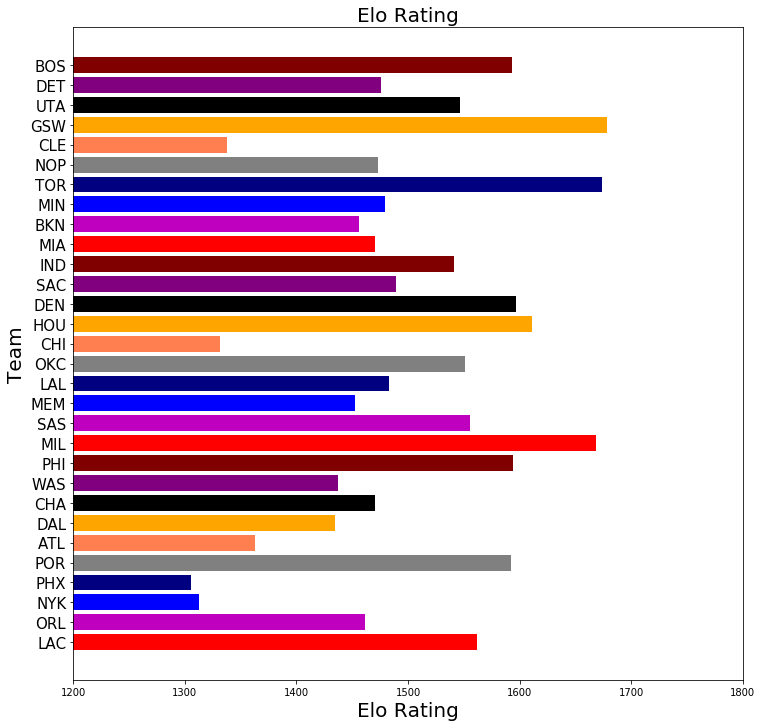

In [48]:
# Bar plot for Elo ratings
y_pos = np.arange(len(df_team))
my_colors = ['r','m','b','navy','grey','coral','orange','k','purple','maroon']*3
plt.figure(figsize=(12,12))
plt.barh(y_pos, list(df_team['Elo']), align='center',color=my_colors)
plt.yticks(y_pos, list(df_team.Team), fontsize=15)
plt.xlabel('Elo Rating',fontsize=20)
plt.ylabel('Team',fontsize=20)
plt.xlim([1200, 1800])
plt.title('Elo Rating',fontsize=20)

The top three teams in Elo rating are Golden State Warriors, Toronto Raptors and Milwaukee Bucks. The bottom three are Chicago Bulls, New York Knicks and Phoenix Suns. At first glance, this ranking looks reasonable. Next let's look at the winning percentage for teams in 2018-19 season to see if Elo rating can properly reflect the strength of teams. 

In [49]:
# Calculate winning percentage for every team during 2017 Season
df_win = df_winner.loc[df_winner['Season']=='2018-19'].groupby('Team_ABB').size().reset_index()
df_win=df_win.rename(index=str, columns={0:'Win'})

df_loss = df_loser.loc[df_loser['Season']=='2018-19'].groupby('Team_ABB').size().reset_index()
df_loss= df_loss.rename(index=str, columns={0:'Loss'})

df_percent = df_win['Win']/(df_win['Win']+df_loss['Loss'])*100
df_percent = df_percent.to_frame()
df_percent['Team'] = df_win['Team_ABB']
df_percent=df_percent.rename(index=str, columns={0:'Win %'})

In [50]:
# Merge winning percentage as a feature into the main dataframe.
df_team = df_team.merge(df_percent,on='Team')

Plot a bar plot showing winning percentages for teams in 2018-19 season.

Text(0.5,1,'Winning Percentage by Team')

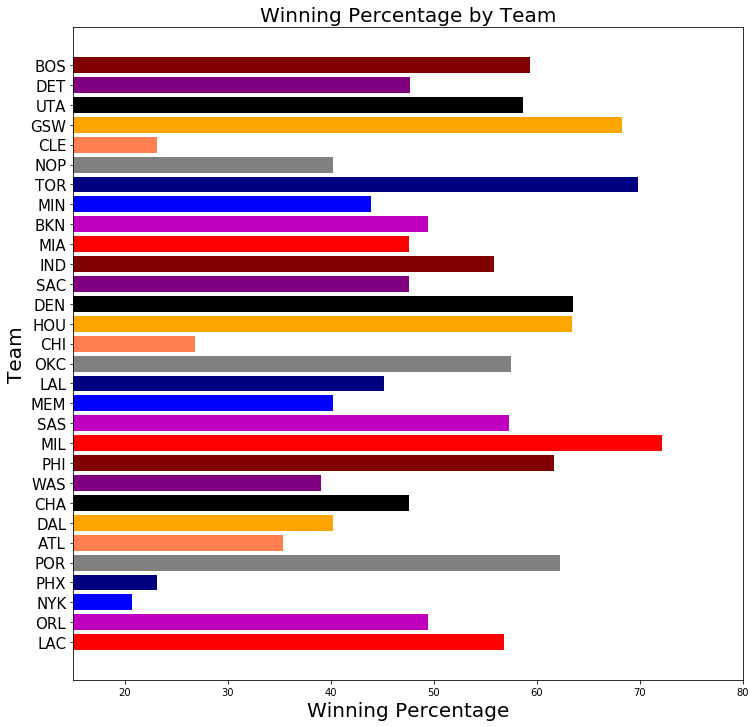

In [52]:
plt.figure(figsize=(12,12))
plt.barh(y_pos, list(df_team['Win %']), align='center',color=my_colors)
plt.yticks(y_pos, list(df_team.Team), fontsize=15)
plt.xlabel('Winning Percentage',fontsize=20)
plt.ylabel('Team',fontsize=20)
plt.xlim([15, 80])
plt.title('Winning Percentage by Team',fontsize=20)

The Milwaukee Bucks had the best record in the league in 2019 season, followed by Toronto Raptors and Golden State Warriors. They are the top three teams in Elo rating. So we have reasons to believe the Elo rating is a good indication of how strong a team is.

## Conclusion and Future Plan

Based on the exploratory analysis above, it is confirmed that the shooting percentage and assistant-to-turnover ratio are positively related to a team's chance of winning an NBA game. In addition, the probability of using Elo rating as a feature in predicting game outcomes is explored. It is shown that Elo rating is a good indication of the strength of teams and should be useful in predicting the winner of an NBA game. These evidences give me confidence that this proposal is viable. In the future, the entire dataset will be used and processed. Then several models will be trained to make predictions on the betting lines.     

Above is my capstone project proposal. I am very excited to have the chance to complete it during my training in Data Incubator program.